In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#######
from numpy import isnan
from pandas import read_csv

import seaborn as sns 
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# load our dataset 


In [5]:
df = pd.read_csv("chronic_kidney_disease_full-2.csv",na_values='?') 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [6]:
df['class'] = df['class'].map({'ckd':1,'notckd':0})
df['htn'] = df['htn'].map({'yes':1,'no':0})
df['dm'] = df['dm'].map({'yes':1,'no':0})
df['cad'] = df['cad'].map({'yes':1,'no':0})
df['appet'] = df['appet'].map({'good':1,'poor':0})
df['ane'] = df['ane'].map({'yes':1,'no':0})
df['pe'] = df['pe'].map({'yes':1,'no':0})
df['ba'] = df['ba'].map({'present':1,'notpresent':0})
df['pcc'] = df['pcc'].map({'present':1,'notpresent':0})
df['pc'] = df['pc'].map({'abnormal':1,'normal':0})
df['rbc'] = df['rbc'].map({'abnormal':1,'normal':0})
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [7]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


the dimensions of our dataset

In [8]:
df.shape

(400, 25)

Let we get some information about our data like the type of each attribute ,the number of null values in each feature 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

Now, let’s see our data statistically

In [10]:
df.describe()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


this table gives us the mean ,standard deviation min,max and the quartiles 

## I. Data Cleaning

## 1. Data Imputation

#### Identify the values NAN

In [11]:
df.isnull().values.any()


True

Now, let’s see the total count of null values that every feature holds

In [12]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

##  4 Strategies for Data imputation 
####       * Mean
####       * Median
####       * Most Frequent Value
####       * Constant

#### Mean strategy


In this study, the
missing numerical features were replaced by the mean

In [13]:
#One of the technique is mean imputation in which the missing values are replaced with the mean value of the entire feature column
#df.fillna(df.mean())
df['age'] = df['age'].fillna(df['age'].mode()[0])

df['bp'] = df['bp'].fillna(df['bp'].mode()[0])

df['bgr'] = df['bgr'].fillna(df['bgr'].mode()[0])

df['bu'] = df['bu'].fillna(df['bu'].mode()[0])

df['sc'] = df['sc'].fillna(df['sc'].mode()[0])

df['sod'] = df['sod'].fillna(df['sod'].mode()[0])

df['pot'] = df['pot'].fillna(df['pot'].mode()[0])

df['hemo'] = df['hemo'].fillna(df['hemo'].mode()[0])

df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])

df['wbcc'] = df['wbcc'].fillna(df['wbcc'].mode()[0])

df['rbcc'] = df['rbcc'].fillna(df['rbcc'].mode()[0])

df





,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,99.0,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


and a mode method was applied to replace the
missing nominal features.

In [14]:
df['sg'] = df['sg'].fillna(df['sg'].mode()[0])
df
df['al'] = df['al'].fillna(df['al'].mode()[0])
df['su'] = df['su'].fillna(df['su'].mode()[0])
df['rbc'] = df['rbc'].fillna(df['rbc'].mode()[0])
df['pc'] = df['pc'].fillna(df['pc'].mode()[0])
df['pcc'] = df['pcc'].fillna(df['pcc'].mode()[0])
df['ba'] = df['ba'].fillna(df['ba'].mode()[0])

df['htn'] = df['htn'].fillna(df['htn'].mode()[0])
df['dm'] = df['dm'].fillna(df['dm'].mode()[0])
df['cad'] = df['cad'].fillna(df['cad'].mode()[0])
df['appet'] = df['appet'].fillna(df['appet'].mode()[0])
df['pe'] = df['pe'].fillna(df['pe'].mode()[0])
df['ane'] = df['ane'].fillna(df['ane'].mode()[0])

df











,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,99.0,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [15]:
from IPython.display import HTML
HTML(df.to_html())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.20,135.0,3.5,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,99.0,18.0,0.80,135.0,3.5,11.3,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.80,135.0,3.5,9.6,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.80,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.40,135.0,3.5,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,74.0,25.0,1.10,142.0,3.2,12.2,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
6,68.0,70.0,1.010,0.0,0.0,0.0,0.0,0.0,0.0,100.0,54.0,24.00,104.0,4.0,12.4,36.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
7,24.0,80.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,31.0,1.10,135.0,3.5,12.4,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,60.0,1.90,135.0,3.5,10.8,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.20,114.0,3.7,9.5,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1


assess missing values after dealing with missing values

In [16]:
df.isnull().values.any()

False

false means that there is nolonger missing values 

In [17]:
X= df.iloc[:,:22]
y= df['class']

In [18]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,135.0,3.5,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,99.0,...,135.0,3.5,11.3,38.0,6000.0,5.2,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,135.0,3.5,9.6,31.0,7500.0,5.2,0.0,1.0,0.0,0.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,135.0,3.5,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,1.0


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[1.193e+02 8.179e+01 5.035e-03 2.160e+02 9.480e+01 2.820e+01 4.560e+01
 2.520e+01 1.320e+01 2.093e+03 2.341e+03 3.580e+02 3.592e+01 2.628e-01
 1.016e+02 2.939e+02 2.585e+04 1.242e+01 8.820e+01 8.220e+01 2.040e+01
 1.269e+01]
[[1.21e+02 3.60e+01 1.20e+00 7.80e+03]
 [9.90e+01 1.80e+01 8.00e-01 6.00e+03]
 [4.23e+02 5.30e+01 1.80e+00 7.50e+03]
 [1.17e+02 5.60e+01 3.80e+00 6.70e+03]
 [1.06e+02 2.60e+01 1.40e+00 7.30e+03]]


In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [False False False  True False False False False False False False  True
 False False False False False False  True  True False False]
Feature Ranking: [17 12  9  1  3  7  5 13 15 16 18  1 10  6  4  8 19 11  1  1 14  2]


# Random Forest

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf=RandomForestClassifier(n_estimators=100)

In [29]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=clf.predict(X_test)

In [31]:
from sklearn import metrics

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [33]:
from sklearn import metrics 
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)
print("Precision:",(metrics.precision_score(y_test, y_pred))*100)
print("Recall:",(metrics.recall_score(y_test, y_pred))*100)
print("F-measure:",(metrics.f1_score(y_test, y_pred))*100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F-measure: 100.0


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predt = clf.predict(X_test)
y_predt

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [35]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",(metrics.accuracy_score(y_test, y_predt))*100)
print("Precision:",(metrics.precision_score(y_test, y_predt))*100)
print("Recall:",(metrics.recall_score(y_test, y_predt))*100)
print("F-measure:",(metrics.f1_score(y_test, y_predt))*100)

Accuracy: 95.0
Precision: 95.16129032258065
Recall: 96.72131147540983
F-measure: 95.9349593495935


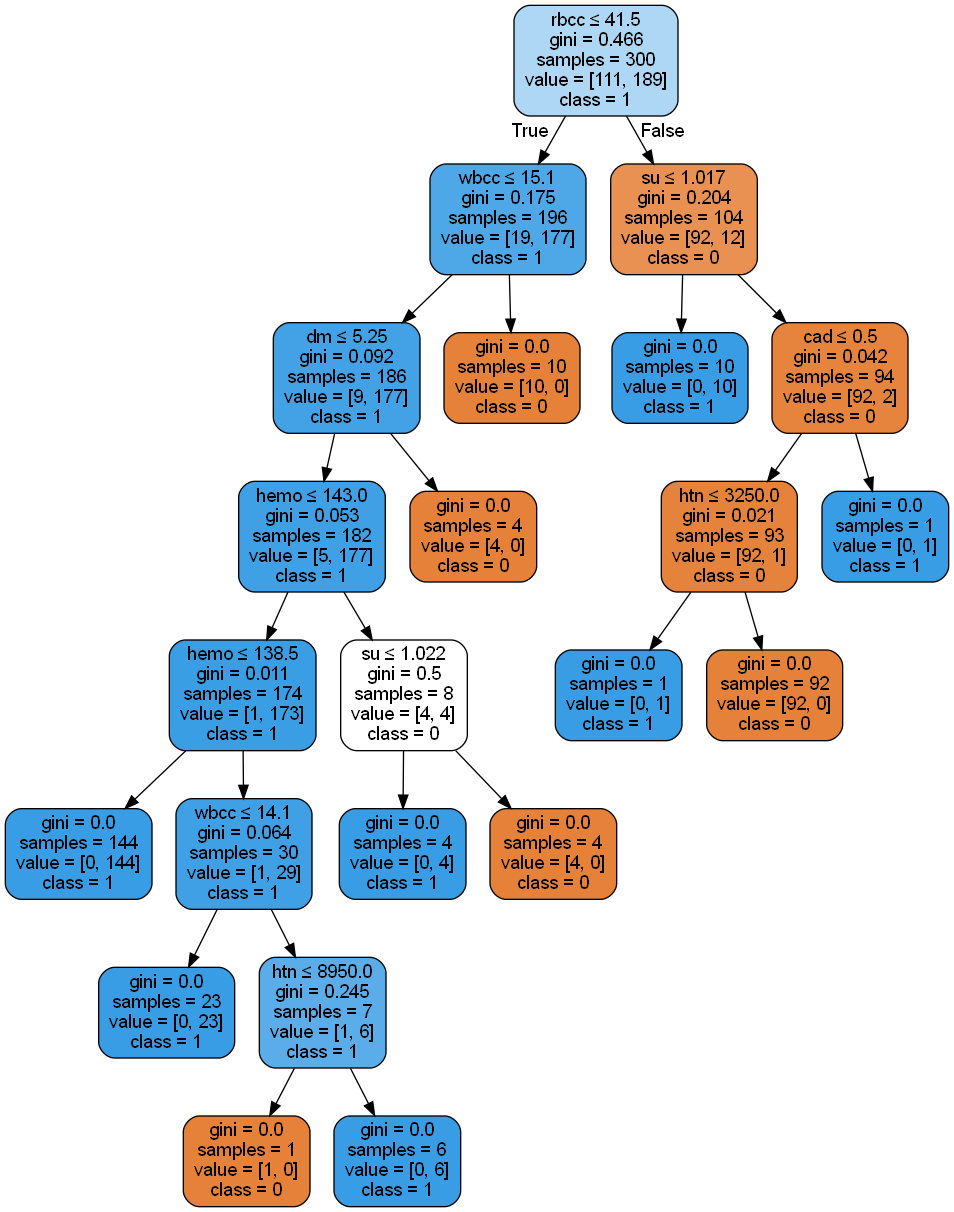

In [38]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
feature_cols = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Erreur')

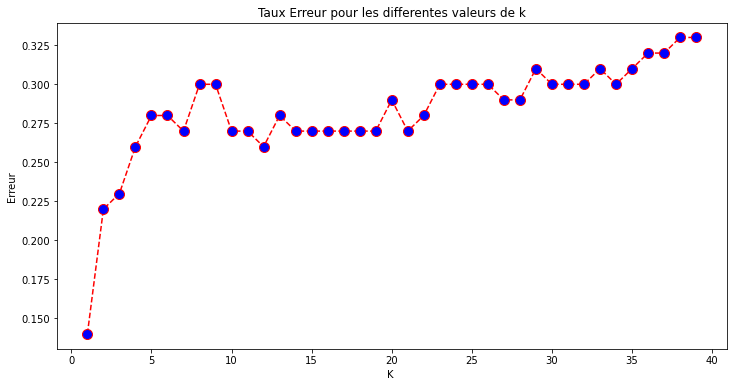

In [40]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [41]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [42]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.73


In [43]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)
print("Precision:",(metrics.precision_score(y_test, y_pred))*100)
print("Recall:",(metrics.recall_score(y_test, y_pred))*100)
print("F-measure:",(metrics.f1_score(y_test, y_pred))*100)

Accuracy: 73.0
Precision: 85.41666666666666
Recall: 67.21311475409836
F-measure: 75.22935779816513


# svm 


In [44]:
# divide the data into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Params by default


In [45]:
# svm model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [46]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        30
           1       0.76      0.78      0.77        50

    accuracy                           0.71        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.71      0.71      0.71        80



#  Linear kernel


In [47]:
# Kernel linear
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.90      0.96      0.93        48

    accuracy                           0.91        80
   macro avg       0.92      0.90      0.91        80
weighted avg       0.91      0.91      0.91        80



#  Polynomial kernel

In [48]:
# Kernel poly
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        33
           1       0.76      0.83      0.80        47

    accuracy                           0.75        80
   macro avg       0.74      0.73      0.74        80
weighted avg       0.75      0.75      0.75        80



#  Sigmoid kernel 


In [49]:
# Kernel sigmoid
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      0.59      0.69        71

    accuracy                           0.53        80
   macro avg       0.41      0.30      0.34        80
weighted avg       0.73      0.53      0.61        80



The kernel scores for this dataset are:

Gaussian kernel : 0.70

Polynomial kernel : 0.92

Linear kernel : 0.73

Sigmoid kernel : 0.53

We can conclude that the data follow a polynomial form rather than a linear form.

In [50]:
# Kernel rbf (by défault)
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        30
           1       0.76      0.78      0.77        50

    accuracy                           0.71        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.71      0.71      0.71        80



# with GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [52]:
print("Best parameter by GridSeachCV")
print(grid.best_params_)

Best parameter by GridSeachCV
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


# Comparing results

## Comparative table

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
#We will display a table that orders the models from the best performing to the worst performing according to the scores1=accuracy_score(y_test, y_pred_svc_1)
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Support Vector Machines Linaire,0.9125
2,Support Vector Machines polynomiale,0.7500
0,Support Vector Machines RBF,0.7125
3,Support Vector Machines sigmoïde,0.5250


# Graph ROC

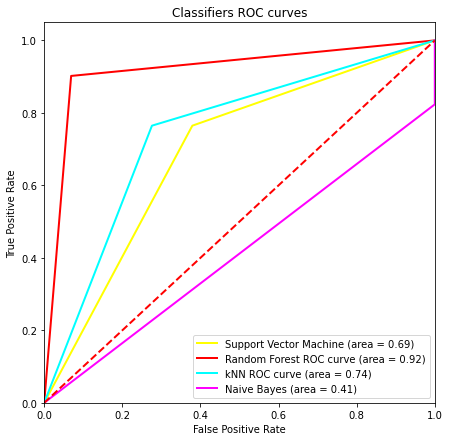

In [54]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machine (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Naive Bayes (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()